In [ ]:
!conda install numpy matplotlib seaborn

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import islice
import itertools
sns.set()

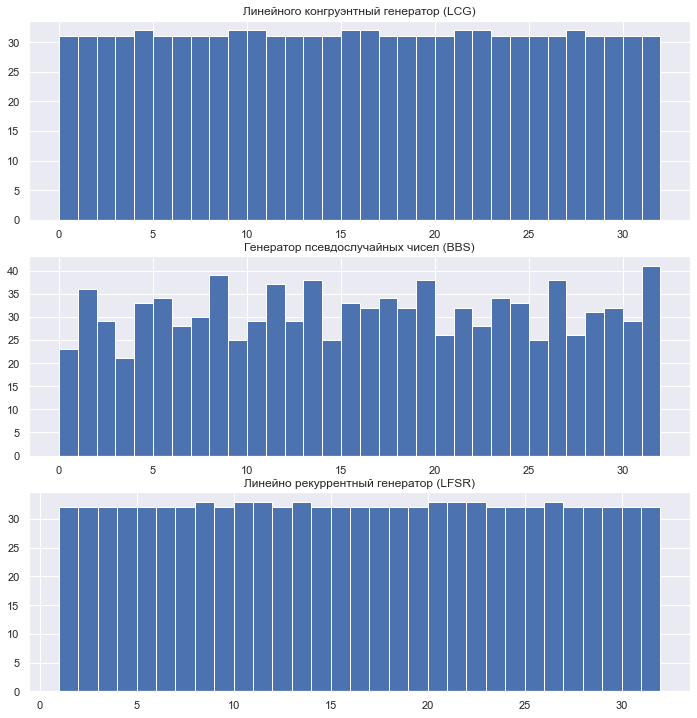

In [12]:
def is_coprime(x, y):
    return np.gcd(x, y) == 1

def is_prime(n):
    if n < 2:
        return False
    for number in islice(itertools.count(2), int(np.sqrt(n) - 1)):
        if n % number == 0:
            return False

    return True

class Generator:
    # linear congruential generator
    def lcg(self, limit, a, c, modulus, seed=1):
        fvalue = 0
        x = seed
        while fvalue < limit:
            fvalue += 1
            x = (a * x + c) % modulus
            yield x

    # Blum Blum Shub
    def bbs(self, limit, p, q, seed=1):
        np.random.seed(seed)
        if not (is_prime(p) and p % 4 == 3 and is_prime(q) and q % 4 == 3):
            raise ValueError("Wrong p or q")
        M = p * q
        # print(f"p = {p}")
        # print(f"q = {q}")
        # print(f"M = {M}")
        xs = np.array(np.nonzero(is_coprime(np.arange(2, M, dtype="int"), M)))[0]
        x_ind = np.random.randint(0, len(xs))
        np.random.seed()
        x = xs[x_ind]
        # print(x)
        #print(f"x = {x}")
        fvalue = 0
        while fvalue < limit:
            fvalue += 1
            out = 0
            for i in range(5):
                x = x ** 2 % M
                #print(x)
                out *= 2
                #print(x % 2)
                out += x % 2
            yield out

    # linear feedback shift register
    def lfsr(self, limit, polynom):
        n = 5
        A = np.eye(5, 5, -1)
        #https://books.ifmo.ru/file/pdf/958.pdf
        A[0] = polynom
        #print(A)
        x = (1, 0, 0, 0, 0)
        fvalue = 0
        while fvalue < limit:
            fvalue += 1
            
            x = A.dot(x) % 2
            #print(x)
            yield np.sum(x * (16, 8, 4, 2, 1))


count = 1000
m = 32
a = 17
c = 5

generator = Generator()
values_lcg = []
for value in generator.lcg(count, a, c, m):
    values_lcg.append(value)

values_bbs = []
for value in generator.bbs(count, 2851, 3559, seed=1):
    values_bbs.append(value)

values_lsfr = []
for value in generator.lfsr(count, (0, 1, 1, 1, 1)):
    values_lsfr.append(value)

fig, ax = plt.subplots(3, 1, figsize=(10, 10))
fig.tight_layout()
ax[0].hist(values_lcg, bins=32, range=(0, 32))
ax[0].set_title('Линейного конгруэнтный генератор (LCG)')
ax[1].hist(values_bbs, bins=32, range=(0, 32))
ax[1].set_title('Генератор псевдослучайных чисел (BBS)')
ax[2].hist(values_lsfr, bins=31, range=(1, 32))
ax[2].set_title('Линейно рекуррентный генератор (LFSR)')
plt.show()